In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree, metrics
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the Pima Indians Diabetes dataset
incendios = pd.read_csv("datos.csv" , delimiter= ';')

#incendios['cat_ambito'] = incendios['ambito'].astype('ambito')

incendios['ambito'] = incendios['ambito'].astype('category').cat.codes

incendios['combus_i'] = incendios['combus_i'].astype('category').cat.codes

incendios['causa_gene'] = incendios['causa_gene'].astype('category').cat.codes

incendios['causa_espe'] = incendios['causa_espe'].astype('category').cat.codes

incendios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5234 entries, 0 to 5233
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   codreg      5234 non-null   int64  
 1   codprov     5234 non-null   int64  
 2   codcom      5234 non-null   int64  
 3   ambito      5234 non-null   int8   
 4   numero      5234 non-null   float64
 5   combus_i    5234 non-null   int8   
 6   causa_gene  5234 non-null   int8   
 7   causa_espe  5234 non-null   int8   
 8   total_plan  5234 non-null   float64
 9   total_veg   5234 non-null   float64
 10  total_otra  5234 non-null   float64
 11  sup_t_a     5234 non-null   float64
dtypes: float64(5), int64(3), int8(4)
memory usage: 347.7 KB


In [5]:
# Divide the data into training and testing sets
X = incendios.drop('sup_t_a', axis=1)
y = incendios['sup_t_a']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [6]:
# DT
dt_reg1 = DecisionTreeRegressor(max_depth=4)
dt_reg1 = dt_reg1.fit(X_train, y_train)

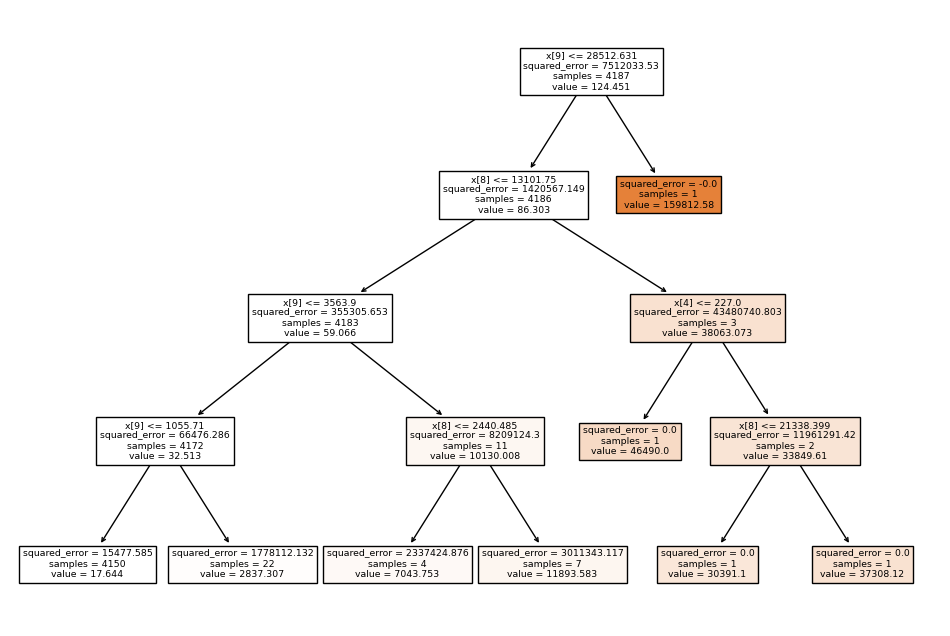

In [7]:
plt.figure(figsize=(12, 8))
tree.plot_tree(dt_reg1, filled=True)
plt.show()

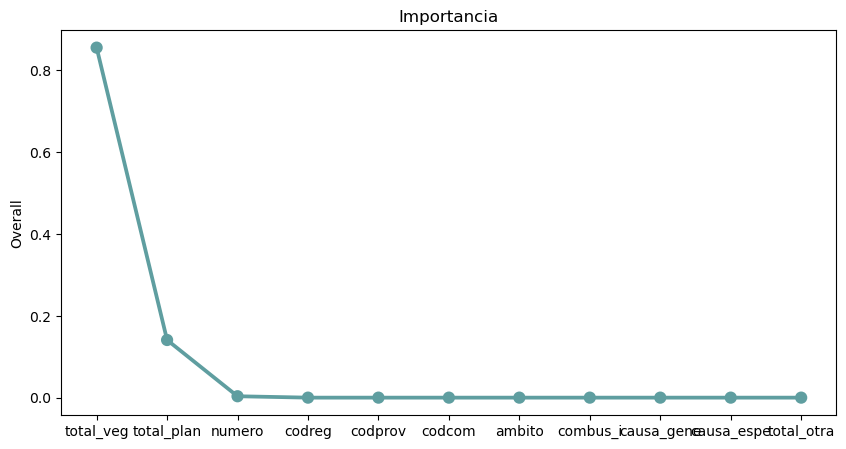

In [8]:
# Variable importance
variable_importance = pd.DataFrame(dt_reg1.feature_importances_, columns=['Overall'])
variable_importance['Feature'] = dt_reg1.feature_names_in_

# Reorder the dataframe based on variable importance
variable_importance = variable_importance.sort_values('Overall', ascending=False)

# Create a new column for the x-axis labels
variable_importance['x_label'] = variable_importance['Feature'].apply(lambda x: x.replace(' ', '\n'))

# Create the plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.pointplot(x='x_label', y='Overall', data=variable_importance, color='cadetblue', ax=ax)
ax.set_xlabel('')
ax.set_ylabel('Overall')
ax.set_title('Importancia')
plt.show()

In [9]:
y_pred = dt_reg1.predict(X_test)

mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = metrics.mean_absolute_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 65372.66515716276
Root Mean Squared Error: 255.6807876183949
Mean Absolute Error: 43.02096255697446
R^2 Score: 0.6805335882014336


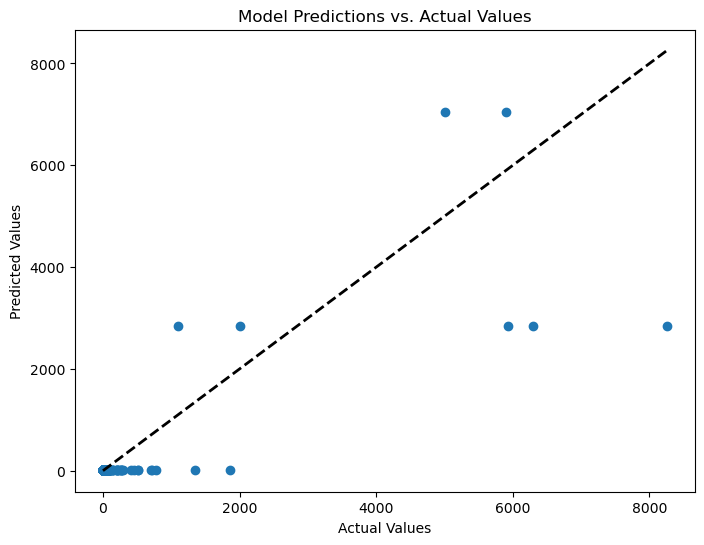

In [10]:
# Plotting predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Model Predictions vs. Actual Values')
plt.show()

In [11]:
from sklearn.model_selection import GridSearchCV

# grid of hyperparameters to search
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [12]:
# Get the best set of hyperparameters
best_params = grid_search.best_params_

# Print the best set of hyperparameters
print("Best parameters:", best_params)

Best parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 4}


In [13]:
# Create a new decision tree classifier with the best hyperparameters
best_reg = DecisionTreeRegressor(**best_params)

# Fit the new classifier to the data
best_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15, min_samples_split=4)

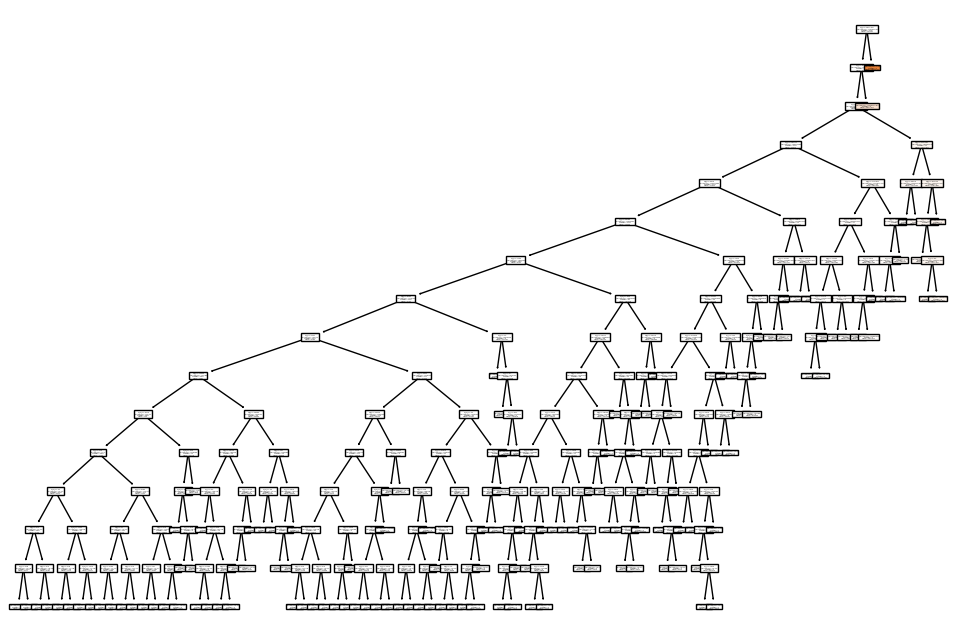

In [14]:
plt.figure(figsize=(12, 8))
tree.plot_tree(best_reg, filled=True)
plt.show()

In [15]:
##Evaluate
y_pred2 = best_reg.predict(X_test)

mse2 = metrics.mean_squared_error(y_test, y_pred2)
rmse2 = np.sqrt(mse2)
mae2 = metrics.mean_absolute_error(y_test, y_pred2)
r2_2 = metrics.r2_score(y_test, y_pred2)
print(f'Mean Squared Error: {mse2}')
print(f'Root Mean Squared Error: {rmse2}')
print(f'Mean Absolute Error: {mae2}')
print(f'R^2 Score: {r2_2}')

Mean Squared Error: 35982.787287371946
Root Mean Squared Error: 189.69129470635164
Mean Absolute Error: 14.267013463653262
R^2 Score: 0.8241575142519906


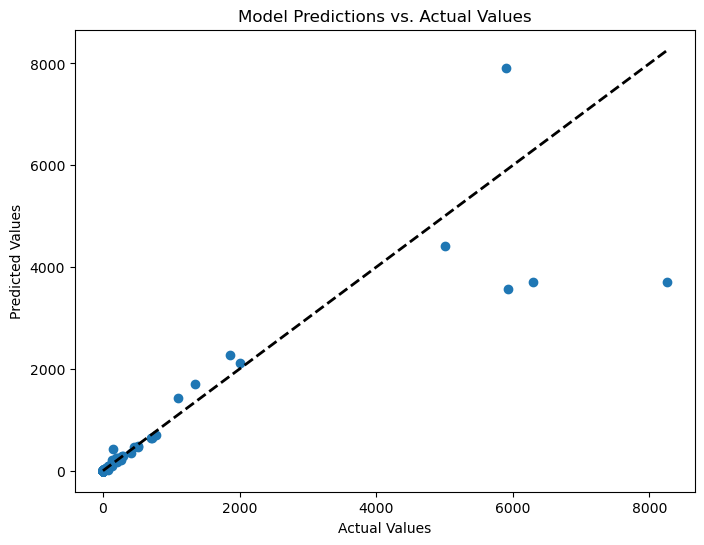

In [16]:
# Plotting predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred2)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Model Predictions vs. Actual Values')
plt.show()

In [17]:
# Variables con los resultados de cada modelo
modelo1 = [255.680788, 43.020963, 0.680534]
modelo2 = [0.002965, 0.002806, 0.999999]

# Crear un diccionario con los resultados de ambos modelos
resultados = {
    'Modelo 1': modelo1,
    'Modelo 2': modelo2
}

# Crear un DataFrame a partir del diccionario
df_resultados = pd.DataFrame(resultados, index=['Root Mean Squared Error', 'Mean Absolute Error', 'R^2 Score'])

# Mostrar el DataFrame
print(df_resultados)

                           Modelo 1  Modelo 2
Root Mean Squared Error  255.680788  0.002965
Mean Absolute Error       43.020963  0.002806
R^2 Score                  0.680534  0.999999
